# Smartphone Market Insights Analysis

## Table Contents

<a href="#Project-Title:-Smartphone-Market-Insights-Analysis">About Project Description</a>

Query No.1. <a href="#1.-Categorizes-smartphones-into-distinct-price-ranges">Categorizes smartphones into distinct price ranges</a>

Query No.2. <a href="#2.-Calculates-the-average-user-ratings-for-each-smartphone-brand">Calculates the average user ratings for each smartphone brand</a>

Query No.3. <a href="#3.-Evaluating-Processor-Types-Based-on-User-Ratings">Evaluating Processor Types Based on User Ratings</a>

Query No.4. <a href="#4.-Analysis-of-Smartphone-Price-Segmentation-by-Memory-Card-Support">Analysis of Smartphone Price Segmentation by Memory Card Support</a>

Query No.5. <a href="#5.-Average-Ratings-and-Battery-Capacity-by-Processor-Speed-Range">Average Ratings and Battery Capacity by Processor Speed Range</a>

Query No.6. <a href="#6.-Top-5-Models-with-Above-Average-Ratings-and-Low-Price">Top 5 Models with Above Average Ratings and Low Price</a>

Query No.7. <a href="#7.-Market-Share-Analysis-by-Brand">Market Share Analysis by Brand</a>

Query No.8. <a href="#8.-Distribution-of-Display-Resolutions">Distribution of Display Resolutions</a>

Query No.9. <a href="#9.-Evolution-of-Camera-Megapixel-Trends-Over-Time">Evolution of Camera Megapixel Trends Over Time</a>

Query No.10. <a href="#10.-Comparison-of-Memory-Card-Support-Across-Brands">Comparison of Memory Card Support Across Brands</a>

Query No.11. <a href="#11.-Analysis-of-Price-and-Ratings-by-Camera-Setup">Analysis of Price and Ratings by Camera Setup</a>

Query No.12. <a href="#12.-Analysis-of-Smartphone-Models-with-High-Ratings-and-Low-Price">Analysis of Smartphone Models with High Ratings and Low Price</a>

In [87]:
# importing libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Using SQL Connector in the Project

         In this project, we use an SQL connector to interact with our database. The SQL connector allows us to establish a connection between our Python scripts and the database, execute SQL queries, and fetch results for analysis. This helps us efficiently retrieve and manipulate the data needed for our analysis of the smartphone market.

In [88]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Bhushan@148",
  database="project_02"
)


In [89]:
mydb

In [90]:
# Show All Tables in the Database

df = pd.read_sql_query(
"""
show tables
"""
, mydb)
df

,Tables_in_project_02
0,smartphone


In [91]:
# Execute SQL query to describe the 'smartphone' table

df = pd.read_sql_query(
"""
describe smartphone
"""
, mydb)
df

,Field,Type,Null,Key,Default,Extra
0,Model,text,YES,,None,
1,Sim,text,YES,,None,
2,OS,text,YES,,None,
3,Price,int,YES,,None,
4,Ratings,double,YES,,None,
5,Display,text,YES,,None,
6,Card,text,YES,,None,
7,Processor_Type,text,YES,,None,
8,Processor_Speed,text,YES,,None,
9,RAM(GB),int,YES,,None,


## Project Title: Smartphone Market Insights Analysis

##### This project aims to provide a clear and detailed understanding of the smartphone market. We will analyze various aspects such as prices, features, user ratings, and technical specifications of different smartphone models using SQL queries. The dataset includes detailed information about each smartphone model, such as its price, battery life, camera quality, processor type, and more. By running these SQL queries, we will uncover important trends and patterns. This information can help consumers make better choices when buying a smartphone and assist manufacturers in developing better products.

### 1. Categorizes smartphones into distinct price ranges

In [92]:
df = pd.read_sql_query(
"""
SELECT 
    CASE 
        WHEN price BETWEEN 0 AND 10000 THEN '0-10000'
        WHEN price BETWEEN 10001 AND 15000 THEN '10001-15000'
        WHEN price BETWEEN 15001 AND 20000 THEN '15001-20000'
        WHEN price BETWEEN 20001 AND 25000 THEN '20001-25000'
        WHEN price BETWEEN 25001 AND 30000 THEN '25001-30000'
        WHEN price BETWEEN 30001 AND 35000 THEN '30001-35000'
        WHEN price BETWEEN 35001 AND 40000 THEN '35001-40000'
        WHEN price BETWEEN 40001 AND 50000 THEN '40001-50000'
        WHEN price BETWEEN 50001 AND 100000 THEN '40001-50000'
        ELSE '100001+'
    END AS price_range,
    COUNT(*) AS no_of_phones
FROM 
    smartphone
GROUP BY 
    price_range
order by price_range

"""
, mydb)
df

,price_range,no_of_phones
0,0-10000,105
1,100001+,29
2,10001-15000,194
3,15001-20000,170
4,20001-25000,97
5,25001-30000,81
6,30001-35000,47
7,35001-40000,36
8,40001-50000,118


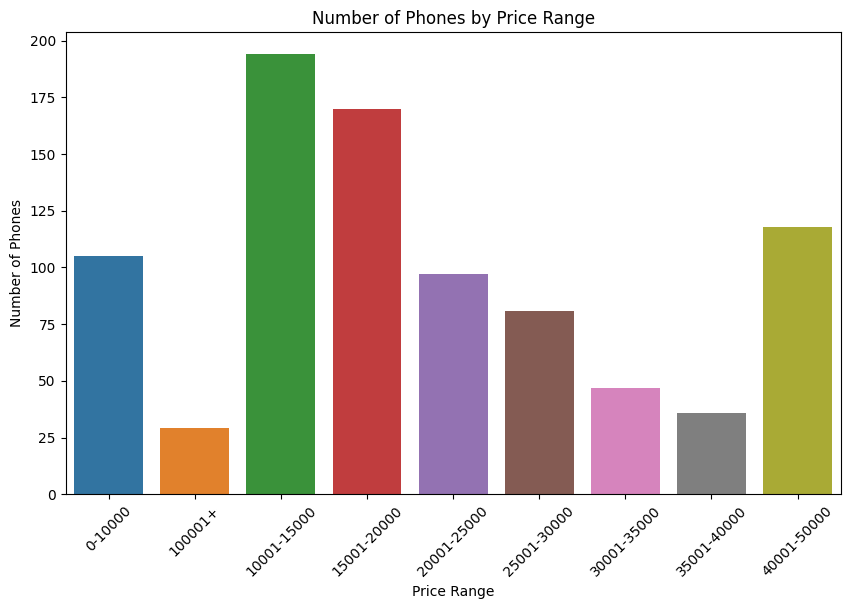

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.price_range, y=df.no_of_phones, data=df)
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.title('Number of Phones by Price Range')
plt.xticks(rotation=45)
plt.show()

### 2. Calculates the average user ratings for each smartphone brand

In [94]:
df = pd.read_sql_query(
"""
with cte as (
        select *, left(Model, LOCATE(' ', model)) as Brand
        from smartphone)
select Brand, round(avg(Ratings),1) as Avg_Ratings
from cte
group by Brand
having count(*) > 10
order by Avg_Ratings desc;
"""
, mydb)
df

,Brand,Avg_Ratings
0,OnePlus,8.2
1,iQOO,8.2
2,Motorola,8.0
3,Samsung,7.9
4,Xiaomi,7.9
5,Oppo,7.9
6,Poco,7.9
7,Honor,7.8
8,Apple,7.7
9,Vivo,7.7


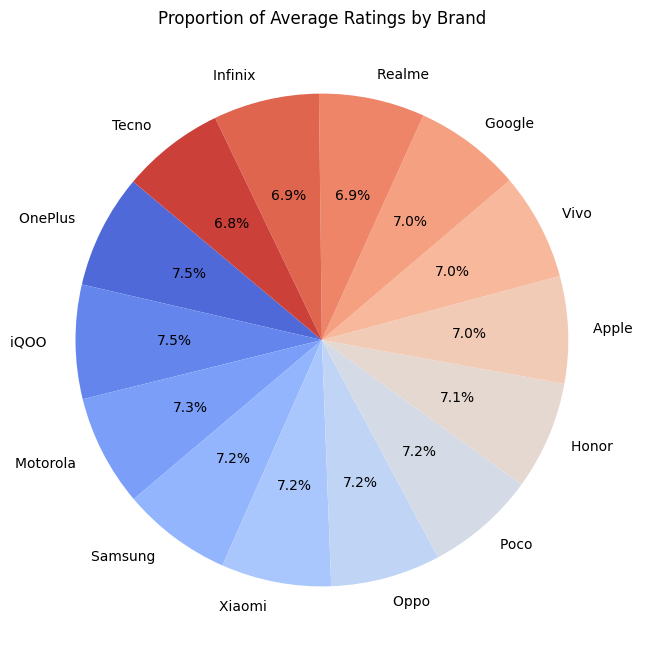

In [95]:
plt.figure(figsize=(10, 8))
colors = sns.color_palette('coolwarm', len(df))
plt.pie(df['Avg_Ratings'], labels=df['Brand'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Average Ratings by Brand')
plt.show()

### 3. Evaluating Processor Types Based on User Ratings

In [96]:
df = pd.read_sql_query(
"""
SELECT substring_index(Processor_Type," ",1) as Processor_Type_, round(AVG(Ratings), 2) as Avg_Ratings
FROM smartphone
GROUP BY Processor_Type_
having count(*)>10
order by Avg_Ratings desc;
"""
, mydb)
df

,Processor_Type_,Avg_Ratings
0,Snapdragon,8.16
1,Dimensity,8.11
2,Exynos,8.06
3,Bionic,7.86
4,Helio,7.25
5,Octa,7.06
6,Tiger,6.72
7,Unisoc,6.55


### 4. Analysis of Smartphone Price Segmentation by Memory Card Support

In [97]:
df = pd.read_sql_query(
"""
SELECT 
    CASE 
        WHEN Card = 'Memory Card Supported' THEN 'Memory Card Supported'
        ELSE 'No Memory Card Support'
    END AS Memory_Card_Support,
    COUNT(*) AS Model_Count,
    ROUND(AVG(Price), 2) AS Avg_Price,
    ROUND(AVG(Ratings), 2) AS Avg_Ratings
FROM smartphone
GROUP BY Memory_Card_Support
ORDER BY Avg_Price DESC;
"""
, mydb)
df

,Memory_Card_Support,Model_Count,Avg_Price,Avg_Ratings
0,No Memory Card Support,800,30632.26,7.86
1,Memory Card Supported,77,17168.66,7.52


### 5. Average Ratings and Battery Capacity by Processor Speed Range

In [98]:
df = pd.read_sql_query(
"""
SELECT 
    CASE 
        WHEN Processor_Speed < 2.0 THEN '< 2.0 GHz'
        WHEN Processor_Speed BETWEEN 2.0 AND 2.5 THEN '2.0-2.5 GHz'
        WHEN Processor_Speed BETWEEN 2.5 AND 3.0 THEN '2.5-3.0 GHz'
        ELSE '> 3.0 GHz'
    END as Processor_Speed_Range,
    round(AVG(Ratings),1) as Avg_Ratings,
    concat("Rs."," ",round(AVG(price))) as avg_price
FROM smartphone
GROUP BY Processor_Speed_Range
ORDER BY Processor_Speed_Range;
"""
, mydb)
df

,Processor_Speed_Range,Avg_Ratings,avg_price
0,< 2.0 GHz,7.6,Rs. 58156
1,> 3.0 GHz,7.1,Rs. 20486
2,2.0-2.5 GHz,8.1,Rs. 31946


### 6. Top 5 Models with Above Average Ratings and Low Price

In [99]:
df = pd.read_sql_query(
"""
WITH Avg_Ratings AS (
    SELECT AVG(Ratings) as Overall_Avg_Ratings
    FROM smartphone
),
Above_Avg_Ratings AS (
    SELECT *
    FROM smartphone
    WHERE Ratings > (SELECT Overall_Avg_Ratings FROM Avg_Ratings)
)
SELECT Model, Price, Ratings
FROM Above_Avg_Ratings
ORDER BY Price ASC
LIMIT 5
"""
, mydb)
df

,Model,Price,Ratings
0,Xiaomi Redmi Note 10 Lite (6GB RAM + 128GB),11999,8.0
1,Xiaomi Redmi Note 11SE,11999,8.0
2,Xiaomi Redmi Note 10S (6GB RAM + 128GB),11999,7.9
3,Xiaomi Redmi Note 11 (6GB RAM + 64GB),12188,7.9
4,Realme 10s,12999,8.0


### 7. Market Share Analysis by Brand

In [100]:
df = pd.read_sql_query(
"""
SELECT LEFT(Model, LOCATE(' ', Model)) AS Brand,
       COUNT(*) AS Model_Count,
       ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM smartphone), 2) AS Market_Share_Percentage
FROM smartphone
GROUP BY Brand
ORDER BY Model_Count DESC;
"""
, mydb)
df

,Brand,Model_Count,Market_Share_Percentage
0,Xiaomi,125,14.25
1,Samsung,116,13.23
2,Vivo,96,10.95
3,Realme,92,10.49
4,Oppo,82,9.35
5,Motorola,48,5.47
6,Apple,43,4.90
7,Poco,40,4.56
8,OnePlus,38,4.33
9,iQOO,32,3.65


### 8. Distribution of Display Resolutions

In [101]:
df = pd.read_sql_query(
"""
SELECT CASE
           WHEN Display LIKE '%1080%' THEN '1080p'
           WHEN Display LIKE '%1440%' THEN '1440p'
           ELSE 'Other'
       END AS Display_Resolution,
       COUNT(*) AS Model_Count
FROM smartphone
GROUP BY Display_Resolution;
"""
, mydb)
df

,Display_Resolution,Model_Count
0,1440p,36
1,1080p,594
2,Other,247


### 9. Evolution of Camera Megapixel Trends Over Time

In [102]:
df = pd.read_sql_query(
"""
SELECT SUBSTRING_INDEX(Model, ' ', 1) AS Model_Name,
       MAX(Rear_Camera) AS Max_Megapixels,
       MIN(Rear_Camera) AS Min_Megapixels
FROM smartphone
GROUP BY Model_Name
ORDER BY Model_Name;
"""
, mydb)
df

,Model_Name,Max_Megapixels,Min_Megapixels
0,Apple,Memory Card Not Supported,12MP
1,Asus,64MP + 16MP + 8MP Triple,50MP + 12MP Dual
2,Blackview,13MP Dual,13MP Dual
3,BLU,48MP Quad,48MP Quad
4,Cola,50MP + 2MP Dual,50MP + 2MP Dual
5,Doogee,108MP + 64MP + 16MP Triple,108MP + 20MP + 16MP Triple
6,Gionee,16MP,16MP
7,Google,50MP + 8MP Dual,12.2MP
8,Honor,64MP Quad,108MP Quad
9,Huawei,Foldable Display,108MP + 8MP + 2MP Triple


### 10. Comparison of Memory Card Support Across Brands

In [103]:
df = pd.read_sql_query(
"""
SELECT LEFT(Model, LOCATE(' ', Model)) AS Brand,
       CASE 
           WHEN Card = 'Memory Card Supported' THEN 'Supported'
           ELSE 'Not Supported'
       END AS Memory_Card_Support,
       COUNT(*) AS Model_Count
FROM smartphone
GROUP BY Brand, Memory_Card_Support
ORDER BY Brand, Memory_Card_Support;

"""
, mydb)
df

,Brand,Memory_Card_Support,Model_Count
0,Apple,Not Supported,43
1,Asus,Not Supported,6
2,Blackview,Supported,1
3,BLU,Supported,1
4,Cola,Not Supported,1
5,Doogee,Not Supported,2
6,Gionee,Not Supported,1
7,Google,Not Supported,12
8,Honor,Not Supported,10
9,Honor,Supported,1


### 11. Analysis of Price and Ratings by Camera Setup

In [104]:
df = pd.read_sql_query(
"""
SELECT 
    CASE 
        WHEN Rear_Camera LIKE '%Triple%' THEN 'Triple Camera'
        WHEN Rear_Camera LIKE '%Quad%' THEN 'Quad Camera'
        ELSE 'Other'
    END AS Camera_Setup,
    ROUND(AVG(Price), 2) AS Avg_Price,
    ROUND(AVG(Ratings), 2) AS Avg_Ratings,
    COUNT(*) AS Model_Count
FROM smartphone
GROUP BY Camera_Setup
ORDER BY Avg_Price DESC;

"""
, mydb)
df

,Camera_Setup,Avg_Price,Avg_Ratings,Model_Count
0,Triple Camera,31473.18,8.05,506
1,Other,28323.55,7.23,242
2,Quad Camera,23628.43,8.07,129


### 12. Analysis of Smartphone Models with High Ratings and Low Price

In [105]:
df = pd.read_sql_query(
"""
WITH Avg_Ratings AS (
    SELECT AVG(Ratings) AS Overall_Avg_Ratings
    FROM smartphone
),
Above_Avg_Ratings AS (
    SELECT Model, Price, Ratings
    FROM smartphone
    WHERE Ratings > (SELECT Overall_Avg_Ratings FROM Avg_Ratings)
)
SELECT Model, Price, Ratings
FROM Above_Avg_Ratings
WHERE Price < (SELECT AVG(Price) FROM smartphone)
ORDER BY Ratings DESC, Price ASC
LIMIT 10;


"""
, mydb)
df

,Model,Price,Ratings
0,Xiaomi Redmi Note 12 Explorer,24999,8.9
1,Infinix Zero 20,17999,8.7
2,Motorola Edge 20 Fusion 5G,18999,8.7
3,Motorola Edge S,22490,8.7
4,Xiaomi Redmi Note 11 Pro Plus 5G (8GB RAM + 25...,22999,8.7
5,Samsung Galaxy M53 5G (8GB RAM + 128GB),25289,8.7
6,Realme X50 Pro 5G (12GB RAM + 256GB),27999,8.7
7,Motorola Moto G82 (8GB RAM + 128GB),20499,8.6
8,Samsung Galaxy A52 (8GB RAM + 128GB),22494,8.6
9,Samsung Galaxy A71,22494,8.6


**See All about Project Material :**

[Smartphone Dataset in csv format](https://drive.google.com/file/d/1q3_qeg8h-SC9uRY2_fleg_9Q_0CCSCF1/view?usp=drive_link)




## See More Projects

- [SQL]()
-
-
-
-



### Connect With Me On
- [Linkdin Profile](https://www.linkedin.com/in/bhushan-gawali-97b645233?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app)
- [GitHub Profile](https://github.com/Bhushan148)
- [Email id](https://accounts.google.com/SignOutOptions?hl=en&continue=https://myaccount.google.com/%3Fpli%3D1&ec=GBRAwAE)
- [Contact With Whatsapp](https://wa.me/qr/45BQWP6TQQ24M1)
- [Instagram id](https://www.instagram.com/bhushangawali_148?igsh=ZXVkYXo4NnU3c2ps)
- [FaceBook id](https://www.facebook.com/bhushan.gawali.568)
- [Address Google](https://maps.app.goo.gl/H61hpmTTuFwPQuFLA)
- [Resume](https://drive.google.com/file/d/1gz5Iv59fybyrm8UBF_mJeJ6h7yQUwnnT/view?usp=drive_link)
